In [20]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator

In [21]:
qm_coord = np.load("raw_data/qm_coord.npy")
mm_coord = np.load("raw_data/mm_coord.npy")
mm_charge = np.load("raw_data/mm_charge.npy")

energy = np.load("raw_data/energy.npy") * 27.2114
energy = energy - energy.mean()
qm_gradient = np.load("raw_data/qm_grad.npy") * 27.2114 / 0.529177249
mm_esp = np.load("raw_data/mm_esp.npy") * 27.2114
mm_esp_grad = np.load("raw_data/mm_esp_grad.npy") * 27.2114 / 0.529177249

energy_sqm = np.load("raw_data/energy_sqm.npy") * 27.2114
energy_sqm = energy_sqm - energy_sqm.mean()
qm_gradient_sqm = np.load("raw_data/qm_grad_sqm.npy") * 27.2114 / 0.529177249
mm_esp_sqm = np.load("raw_data/mm_esp_sqm.npy") * 27.2114
mm_esp_grad_sqm = np.load("raw_data/mm_esp_grad_sqm.npy") * 27.2114 / 0.529177249

energy_sqm2 = np.load("raw_data/energy_sqm2.npy") * 27.2114
energy_sqm2 = energy_sqm2 - energy_sqm2.mean()
qm_gradient_sqm2 = np.load("raw_data/qm_grad_sqm2.npy") * 27.2114 / 0.529177249
mm_esp_sqm2 = np.load("raw_data/mm_esp_sqm2.npy") * 27.2114
mm_esp_grad_sqm2 = np.load("raw_data/mm_esp_grad_sqm2.npy") * 27.2114 / 0.529177249

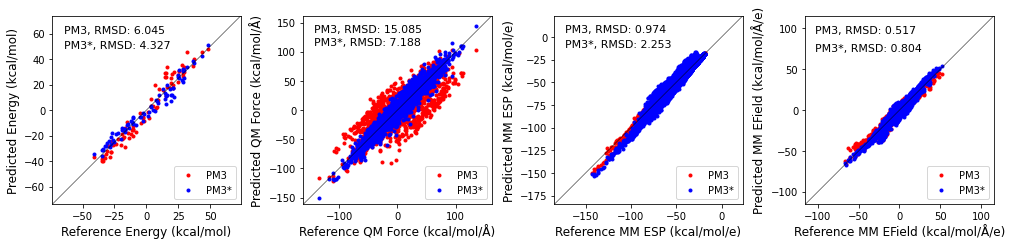

In [19]:
fig, ax = plt.subplots(1, 4, figsize=(14, 14))

e1 = energy * 23.061
e2 = energy_sqm * 23.061
e3 = energy_sqm2 * 23.061
ax[0].plot(e1, e2, linestyle='none', marker='.', color="r", label="PM3")
ax[0].plot(e1, e3, linestyle='none', marker='.', color="b", label="PM3*")
ax[0].set_aspect('equal', adjustable='box')
ax[0].plot([-3.2*23.061, 3.2*23.061], [-3.2*23.061, 3.2*23.061], color="k", linewidth=0.5)
ax[0].set_xlim(-3.2*23.061, 3.2*23.061)
ax[0].set_ylim(-3.2*23.061, 3.2*23.061)
ax[0].set_xlabel("Reference Energy (kcal/mol)", size=12)
ax[0].set_ylabel("Predicted Energy (kcal/mol)", size=12)
ax[0].text(-2.8*23.061, 2.6*23.061, 'PM3, RMSD: %.3f' % np.sqrt(np.mean((e1 - e2)**2)), size=11)
ax[0].text(-2.8*23.061, 2.1*23.061, 'PM3*, RMSD: %.3f' % np.sqrt(np.mean((e1 - e3)**2)), size=11)

f1 = -qm_gradient.reshape(-1) * 23.061
f2 = -qm_gradient_sqm.reshape(-1) * 23.061
f3 = -qm_gradient_sqm2.reshape(-1) * 23.061
ax[1].plot(f1, f2, linestyle='none', marker='.', color="r", label="PM3")
ax[1].plot(f1, f3, linestyle='none', marker='.', color="b", label="PM3*")
ax[1].set_aspect('equal', adjustable='box')
ax[1].plot([-7*23.061, 7*23.061], [-7*23.061, 7*23.061], color="k", linewidth=0.5)
ax[1].set_xlim(-7*23.061, 7*23.061)
ax[1].set_ylim(-7*23.061, 7*23.061)
ax[1].set_xlabel("Reference QM Force (kcal/mol/Å)", size=12)
ax[1].set_ylabel("Predicted QM Force (kcal/mol/Å)", size=12)
ax[1].text(-6.2*23.061, 5.8*23.061, 'PM3, RMSD: %.3f' % np.sqrt(np.mean((f1 - f2)**2)), size=11)
ax[1].text(-6.2*23.061, 4.8*23.061, 'PM3*, RMSD: %.3f' % np.sqrt(np.mean((f1 - f3)**2)), size=11)

esp1 = mm_esp.reshape(-1) * 23.061
esp2 = mm_esp_sqm.reshape(-1) * 23.061
esp3 = mm_esp_sqm2.reshape(-1) * 23.061
ax[2].plot(esp1, esp2, linestyle='none', marker='.', color="r", label="PM3")
ax[2].plot(esp1, esp3, linestyle='none', marker='.', color="b", label="PM3*")
ax[2].set_aspect('equal', adjustable='box')
ax[2].plot([-8*23.061, 1*23.061], [-8*23.061, 1*23.061], color="k", linewidth=0.5)
ax[2].set_xlim(-8*23.061, 1*23.061)
ax[2].set_ylim(-8*23.061, 1*23.061)
ax[2].set_xlabel("Reference MM ESP (kcal/mol/e)", size=12)
ax[2].set_ylabel("Predicted MM ESP (kcal/mol/e)", size=12)
ax[2].text(-7.5*23.061, .2*23.061, 'PM3, RMSD: %.3f' % np.sqrt(np.mean((esp1 - esp2)**2)), size=11)
ax[2].text(-7.5*23.061, -.5*23.061, 'PM3*, RMSD: %.3f' % np.sqrt(np.mean((esp1 - esp3)**2)), size=11)

fmm1 = -mm_esp_grad.reshape(-1) * 23.061
fmm2 = -mm_esp_grad_sqm.reshape(-1) * 23.061
fmm3 = -mm_esp_grad_sqm2.reshape(-1) * 23.061
ax[3].plot(fmm1, fmm2, linestyle='none', marker='.', color="r", label="PM3")
ax[3].plot(fmm1, fmm3, linestyle='none', marker='.', color="b", label="PM3*")
ax[3].set_aspect('equal', adjustable='box')
ax[3].plot([-5*23.061, 5*23.061], [-5*23.061, 5*23.061], color="k", linewidth=0.5)
ax[3].set_xlim(-5*23.061, 5*23.061)
ax[3].set_ylim(-5*23.061, 5*23.061)
ax[3].set_xlabel("Reference MM EField (kcal/mol/Å/e)", size=12)
ax[3].set_ylabel("Predicted MM EField (kcal/mol/Å/e)", size=12)
ax[3].text(-4.5*23.061, 4.1*23.061, 'PM3, RMSD: %.3f' % np.sqrt(np.mean((fmm1 - fmm2)**2)), size=11)
ax[3].text(-4.5*23.061, 3.1*23.061, 'PM3*, RMSD: %.3f' % np.sqrt(np.mean((fmm1 - fmm3)**2)), size=11)

for a in ax.ravel():
    a.legend(loc=4)

fig.tight_layout()
# fig.savefig("ml_qmmm_diff.png", dpi=300)

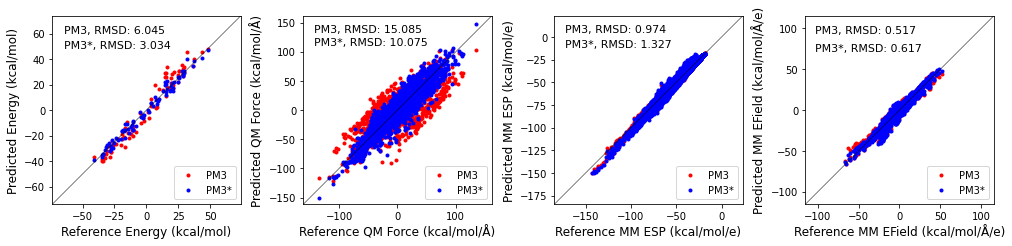

In [23]:
fig, ax = plt.subplots(1, 4, figsize=(14, 14))

e1 = energy * 23.061
e2 = energy_sqm * 23.061
e3 = energy_sqm2 * 23.061
ax[0].plot(e1, e2, linestyle='none', marker='.', color="r", label="PM3")
ax[0].plot(e1, e3, linestyle='none', marker='.', color="b", label="PM3*")
ax[0].set_aspect('equal', adjustable='box')
ax[0].plot([-3.2*23.061, 3.2*23.061], [-3.2*23.061, 3.2*23.061], color="k", linewidth=0.5)
ax[0].set_xlim(-3.2*23.061, 3.2*23.061)
ax[0].set_ylim(-3.2*23.061, 3.2*23.061)
ax[0].set_xlabel("Reference Energy (kcal/mol)", size=12)
ax[0].set_ylabel("Predicted Energy (kcal/mol)", size=12)
ax[0].text(-2.8*23.061, 2.6*23.061, 'PM3, RMSD: %.3f' % np.sqrt(np.mean((e1 - e2)**2)), size=11)
ax[0].text(-2.8*23.061, 2.1*23.061, 'PM3*, RMSD: %.3f' % np.sqrt(np.mean((e1 - e3)**2)), size=11)

f1 = -qm_gradient.reshape(-1) * 23.061
f2 = -qm_gradient_sqm.reshape(-1) * 23.061
f3 = -qm_gradient_sqm2.reshape(-1) * 23.061
ax[1].plot(f1, f2, linestyle='none', marker='.', color="r", label="PM3")
ax[1].plot(f1, f3, linestyle='none', marker='.', color="b", label="PM3*")
ax[1].set_aspect('equal', adjustable='box')
ax[1].plot([-7*23.061, 7*23.061], [-7*23.061, 7*23.061], color="k", linewidth=0.5)
ax[1].set_xlim(-7*23.061, 7*23.061)
ax[1].set_ylim(-7*23.061, 7*23.061)
ax[1].set_xlabel("Reference QM Force (kcal/mol/Å)", size=12)
ax[1].set_ylabel("Predicted QM Force (kcal/mol/Å)", size=12)
ax[1].text(-6.2*23.061, 5.8*23.061, 'PM3, RMSD: %.3f' % np.sqrt(np.mean((f1 - f2)**2)), size=11)
ax[1].text(-6.2*23.061, 4.8*23.061, 'PM3*, RMSD: %.3f' % np.sqrt(np.mean((f1 - f3)**2)), size=11)

esp1 = mm_esp.reshape(-1) * 23.061
esp2 = mm_esp_sqm.reshape(-1) * 23.061
esp3 = mm_esp_sqm2.reshape(-1) * 23.061
ax[2].plot(esp1, esp2, linestyle='none', marker='.', color="r", label="PM3")
ax[2].plot(esp1, esp3, linestyle='none', marker='.', color="b", label="PM3*")
ax[2].set_aspect('equal', adjustable='box')
ax[2].plot([-8*23.061, 1*23.061], [-8*23.061, 1*23.061], color="k", linewidth=0.5)
ax[2].set_xlim(-8*23.061, 1*23.061)
ax[2].set_ylim(-8*23.061, 1*23.061)
ax[2].set_xlabel("Reference MM ESP (kcal/mol/e)", size=12)
ax[2].set_ylabel("Predicted MM ESP (kcal/mol/e)", size=12)
ax[2].text(-7.5*23.061, .2*23.061, 'PM3, RMSD: %.3f' % np.sqrt(np.mean((esp1 - esp2)**2)), size=11)
ax[2].text(-7.5*23.061, -.5*23.061, 'PM3*, RMSD: %.3f' % np.sqrt(np.mean((esp1 - esp3)**2)), size=11)

fmm1 = -mm_esp_grad.reshape(-1) * 23.061
fmm2 = -mm_esp_grad_sqm.reshape(-1) * 23.061
fmm3 = -mm_esp_grad_sqm2.reshape(-1) * 23.061
ax[3].plot(fmm1, fmm2, linestyle='none', marker='.', color="r", label="PM3")
ax[3].plot(fmm1, fmm3, linestyle='none', marker='.', color="b", label="PM3*")
ax[3].set_aspect('equal', adjustable='box')
ax[3].plot([-5*23.061, 5*23.061], [-5*23.061, 5*23.061], color="k", linewidth=0.5)
ax[3].set_xlim(-5*23.061, 5*23.061)
ax[3].set_ylim(-5*23.061, 5*23.061)
ax[3].set_xlabel("Reference MM EField (kcal/mol/Å/e)", size=12)
ax[3].set_ylabel("Predicted MM EField (kcal/mol/Å/e)", size=12)
ax[3].text(-4.5*23.061, 4.1*23.061, 'PM3, RMSD: %.3f' % np.sqrt(np.mean((fmm1 - fmm2)**2)), size=11)
ax[3].text(-4.5*23.061, 3.1*23.061, 'PM3*, RMSD: %.3f' % np.sqrt(np.mean((fmm1 - fmm3)**2)), size=11)

for a in ax.ravel():
    a.legend(loc=4)

fig.tight_layout()
# fig.savefig("ml_qmmm_diff.png", dpi=300)